import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import folium
import math
import plotly.graph_objects as go
import plotly.express as px
import eli5
import graphviz
import networkx as nx

from eli5.sklearn import PermutationImportance
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from sklearn import tree
from matplotlib import pyplot as plt
from string import ascii_letters
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

In [61]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

In [111]:
df1 = pd.read_csv('/home/herrharambe/Desktop/GFG/input_updated/Delhi_updated.csv')
df2 = pd.read_csv('/home/herrharambe/Desktop/GFG/input_updated/Mumbai_updated.csv')
df3 = pd.read_csv('/home/herrharambe/Desktop/GFG/input_updated/Chennai_updated.csv')
df4 = pd.read_csv('/home/herrharambe/Desktop/GFG/input_updated/Hyderabad_updated.csv')
df5 = pd.read_csv('/home/herrharambe/Desktop/GFG/input_updated/Bangalore_updated.csv')
df6 = pd.read_csv('/home/herrharambe/Desktop/GFG/input_updated/Kolkata_updated.csv')

In [112]:
df2.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude,EncodedLocation
0,48.5,720,Kharghar,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,19.05103,73.07565,0.1
1,45.0,600,Kharghar,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,19.05103,73.07565,0.1
2,67.0,650,Kharghar,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,19.05103,73.07565,0.1
3,45.0,650,Kharghar,1,1,1,0,0,1,0,...,0,0,0,0,0,1,0,19.05103,73.07565,0.1
4,50.0,665,Kharghar,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,19.05103,73.07565,0.1


In [113]:
df1.replace(9, np.nan, inplace=True)
df2.replace(9, np.nan, inplace=True)
df3.replace(9, np.nan, inplace=True)
df4.replace(9, np.nan, inplace=True)
df5.replace(9, np.nan, inplace=True)
df6.replace(9, np.nan, inplace=True)

In [114]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
df5 = df5.dropna()
df6 = df6.dropna()

In [115]:
print(f"{y_}Delhi:{r_}{df1.shape}\n")
print(f"{y_}Mumbai:{r_}{df2.shape}\n")
print(f"{y_}Chennai:{r_}{df3.shape}\n")
print(f"{y_}Hyderabad:{r_}{df4.shape}\n")
print(f"{y_}Bangalore:{r_}{df5.shape}\n")
print(f"{y_}Kolkata:{r_}{df6.shape}\n")

Delhi:(1985, 43)

Mumbai:(1395, 43)

Chennai:(2227, 43)

Hyderabad:(2432, 43)

Bangalore:(1949, 43)

Kolkata:(72, 43)



In [116]:
frames = [df1]
merged = pd.concat(frames)
merged = merged.loc[:, ~merged.columns.str.contains('^Unnamed')]

In [117]:
merged.columns
merged = merged.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
merged = merged.dropna()

/tmp/ipykernel_29302/2552728867.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=merged.corr()
/tmp/ipykernel_29302/2552728867.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged.corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,


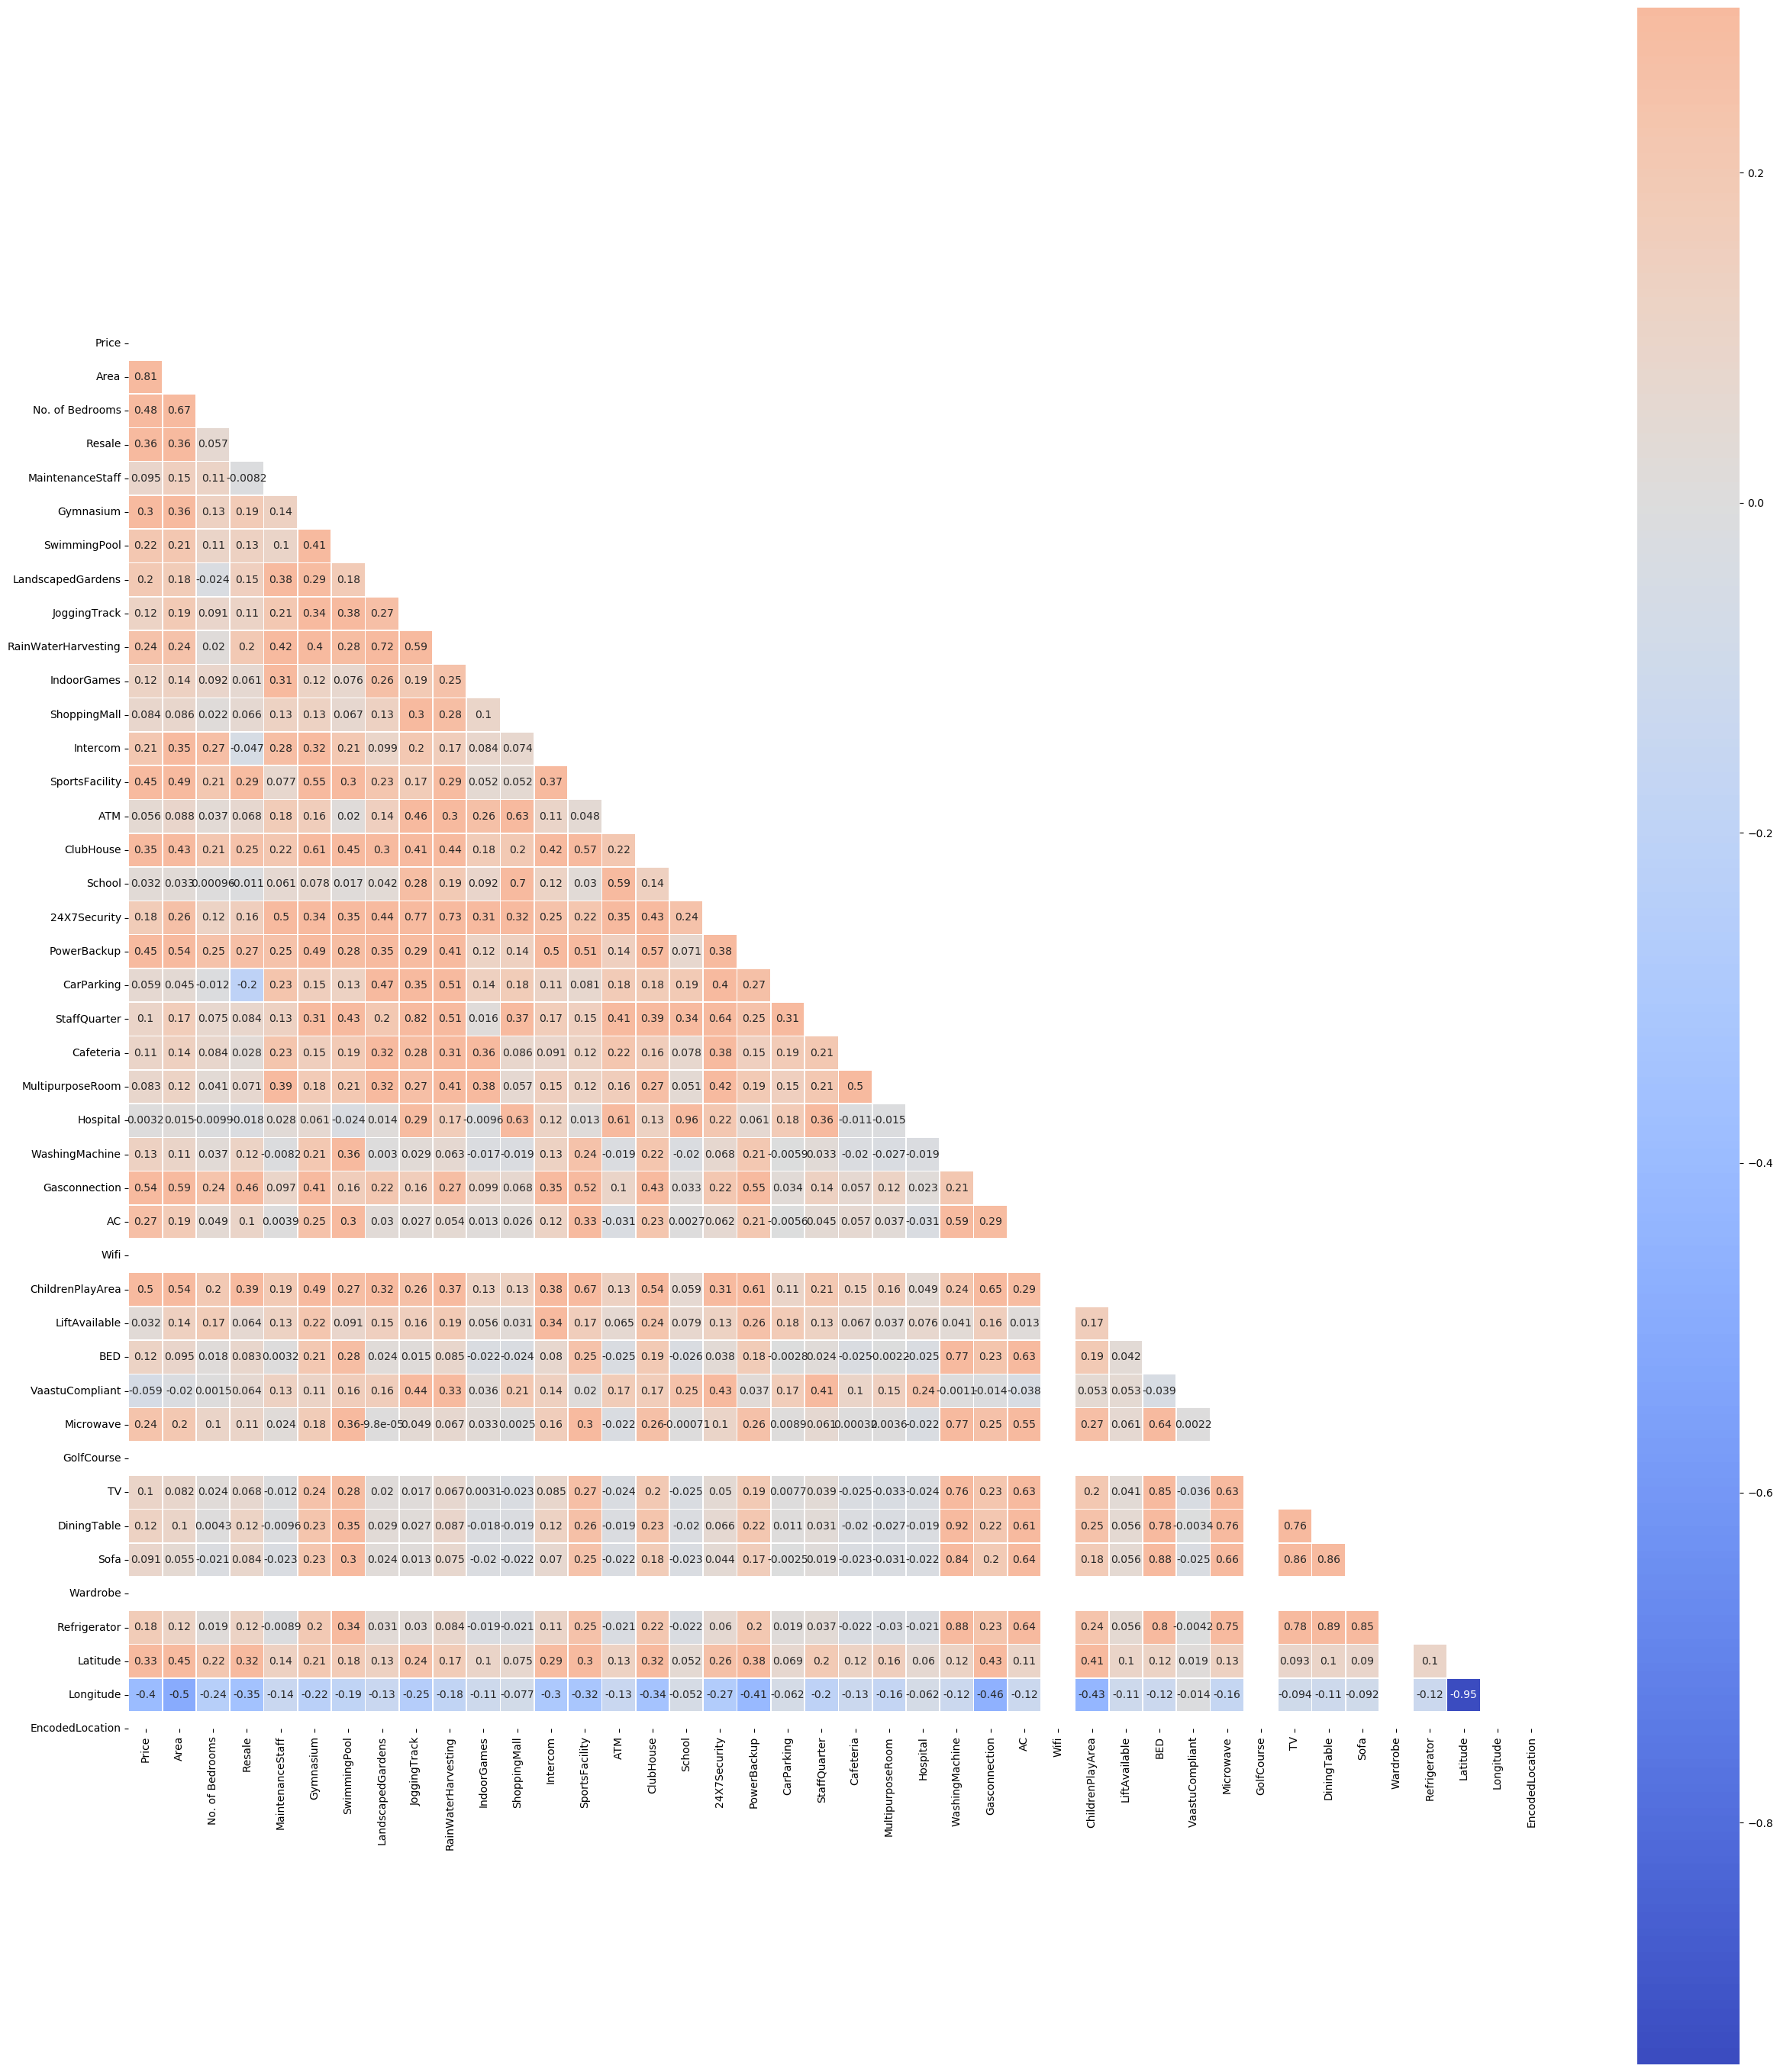

In [118]:
plt.figure(figsize=(30,35))
corr=merged.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(merged.corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [119]:
indices = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_array(cor_matrix)
G = nx.relabel_nodes(G,lambda x: indices[x])
G.edges(data=True)

EdgeDataView([('Price', 'Price', {'weight': 1.0}), ('Price', 'Area', {'weight': 0.8148037171619166}), ('Price', 'No. of Bedrooms', {'weight': 0.47540605168133165}), ('Price', 'Resale', {'weight': 0.3616232250334589}), ('Price', 'MaintenanceStaff', {'weight': 0.0947159303185861}), ('Price', 'Gymnasium', {'weight': 0.30457412876234113}), ('Price', 'SwimmingPool', {'weight': 0.2174934729353957}), ('Price', 'LandscapedGardens', {'weight': 0.20247045559400045}), ('Price', 'JoggingTrack', {'weight': 0.12145875821841969}), ('Price', 'RainWaterHarvesting', {'weight': 0.242826926266917}), ('Price', 'IndoorGames', {'weight': 0.11533611130300239}), ('Price', 'ShoppingMall', {'weight': 0.08364315618032508}), ('Price', 'Intercom', {'weight': 0.21277206859913564}), ('Price', 'SportsFacility', {'weight': 0.4457514351667995}), ('Price', 'ATM', {'weight': 0.05617256082792282}), ('Price', 'ClubHouse', {'weight': 0.34720756601148745}), ('Price', 'School', {'weight': 0.03249318782670381}), ('Price', '24X7

In [120]:
def corr_network(G, corr_direction, min_correlation):
    H = G.copy()

    for s1, s2, weight in G.edges(data=True):       
        if corr_direction == "positive":
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(s1, s2)
        else:
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(s1, s2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    weights = tuple([(1+abs(x))**2 for x in weights])
   
    d = dict(nx.degree(H))
    nodelist=d.keys()
    node_sizes=d.values()
    
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(15,15))

    nx.draw_networkx_nodes(H,positions,node_color='#d100d1',nodelist=nodelist,
                       node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)

    nx.draw_networkx_labels(H, positions, font_size=8)
    if corr_direction == "positive":
        edge_colour = plt.cm.summer 
    else:
        edge_colour = plt.cm.autumn
        
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 

/home/herrharambe/.local/lib/python3.10/site-packages/matplotlib/colors.py:532: RuntimeWarning: invalid value encountered in cast
  xa = xa.astype(int)


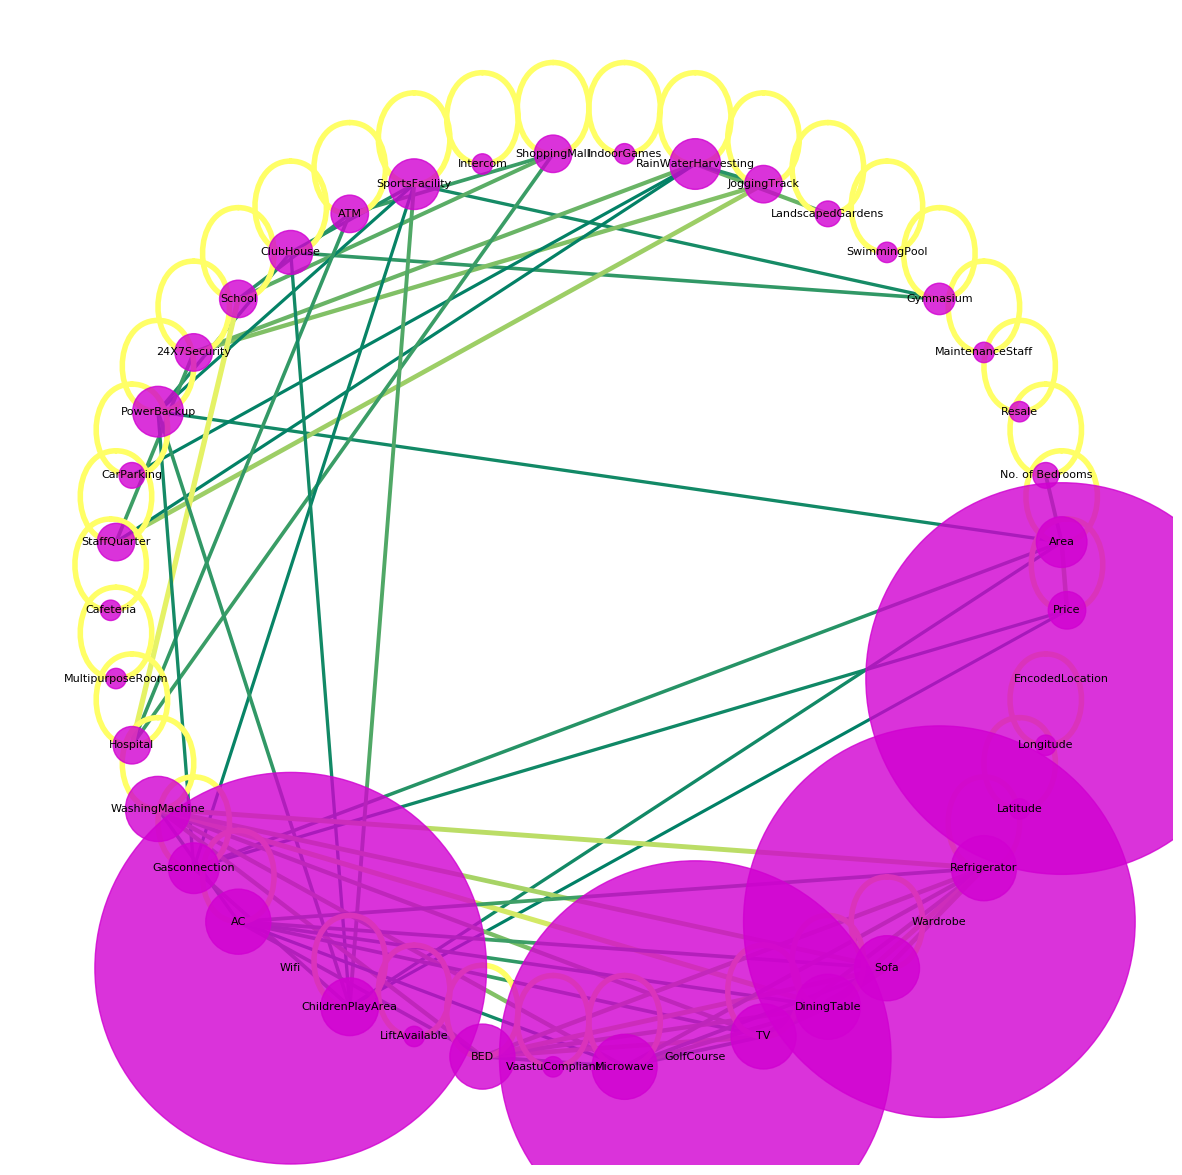

In [121]:
corr_network(G, corr_direction="positive",min_correlation = 0.5)

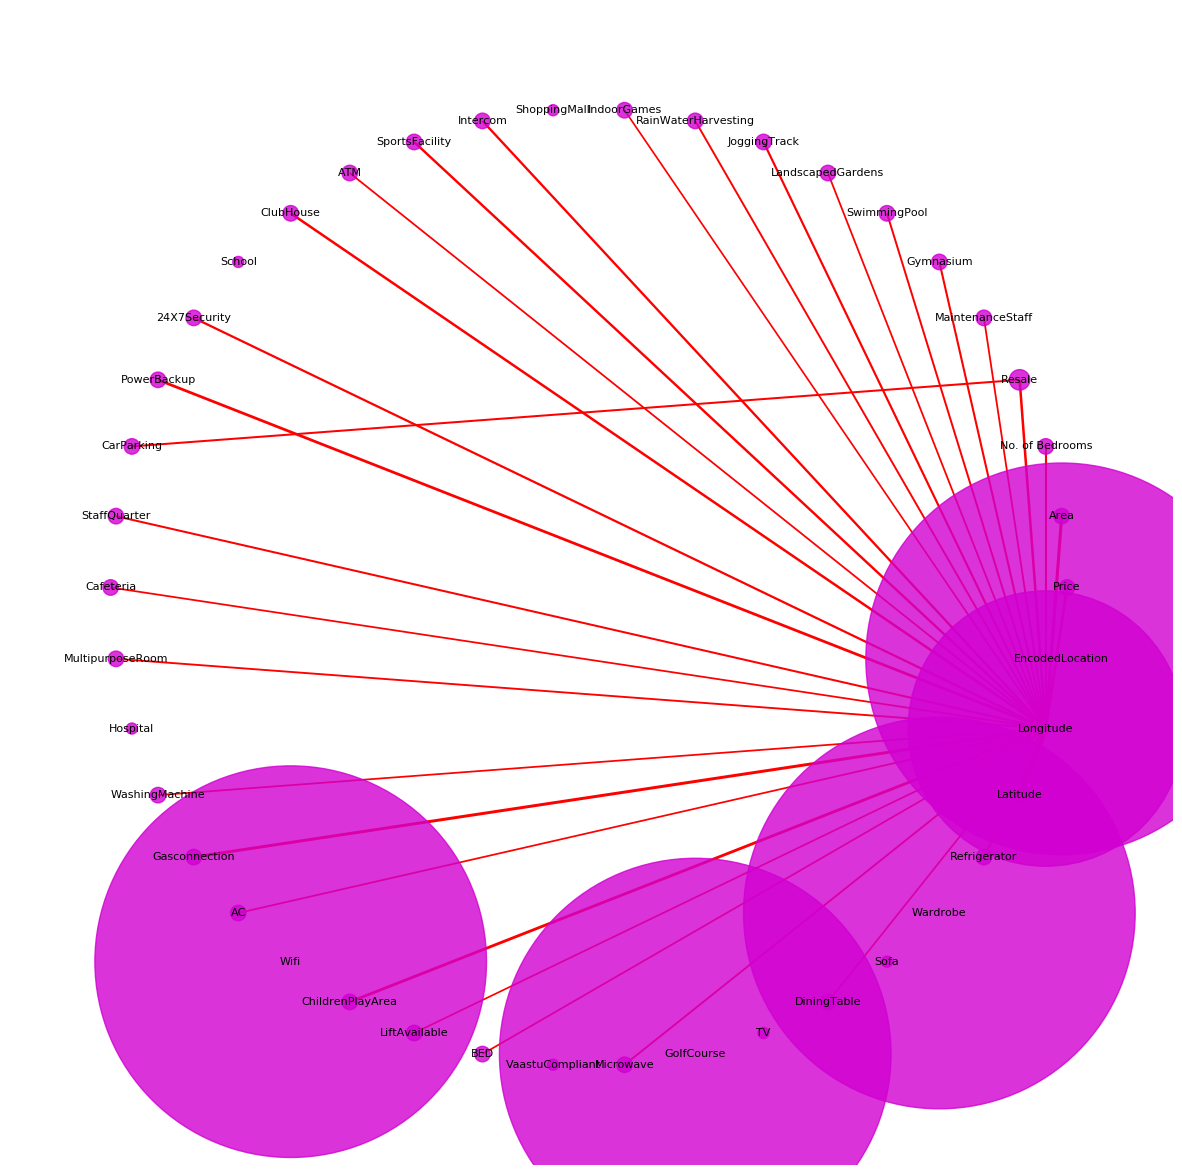

In [122]:
corr_network(G, corr_direction="negative",min_correlation = -0.1)

In [123]:
feature_names = ['Area','No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'ChildrenPlayArea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator','Latitude','Longitude','EncodedLocation']#'2019 q1','2019 q2','2018 q1','2018 q2','2017 q1','2017 q2']

X = merged[feature_names]
y = merged['Price']

In [124]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=4800)
model = RandomForestRegressor().fit(train_X, train_y)

In [125]:
perm = PermutationImportance(model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
1.2922 ± 0.1793,Area
0.2362 ± 0.0784,Longitude
0.0397 ± 0.0052,Latitude
0.0232 ± 0.0064,No. of Bedrooms
0.0128 ± 0.0094,Resale
0.0106 ± 0.0081,ClubHouse
0.0074 ± 0.0044,Gasconnection
0.0044 ± 0.0003,SwimmingPool
0.0040 ± 0.0007,LiftAvailable
0.0039 ± 0.0010,RainWaterHarvesting


In [126]:
model2 = DecisionTreeRegressor(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

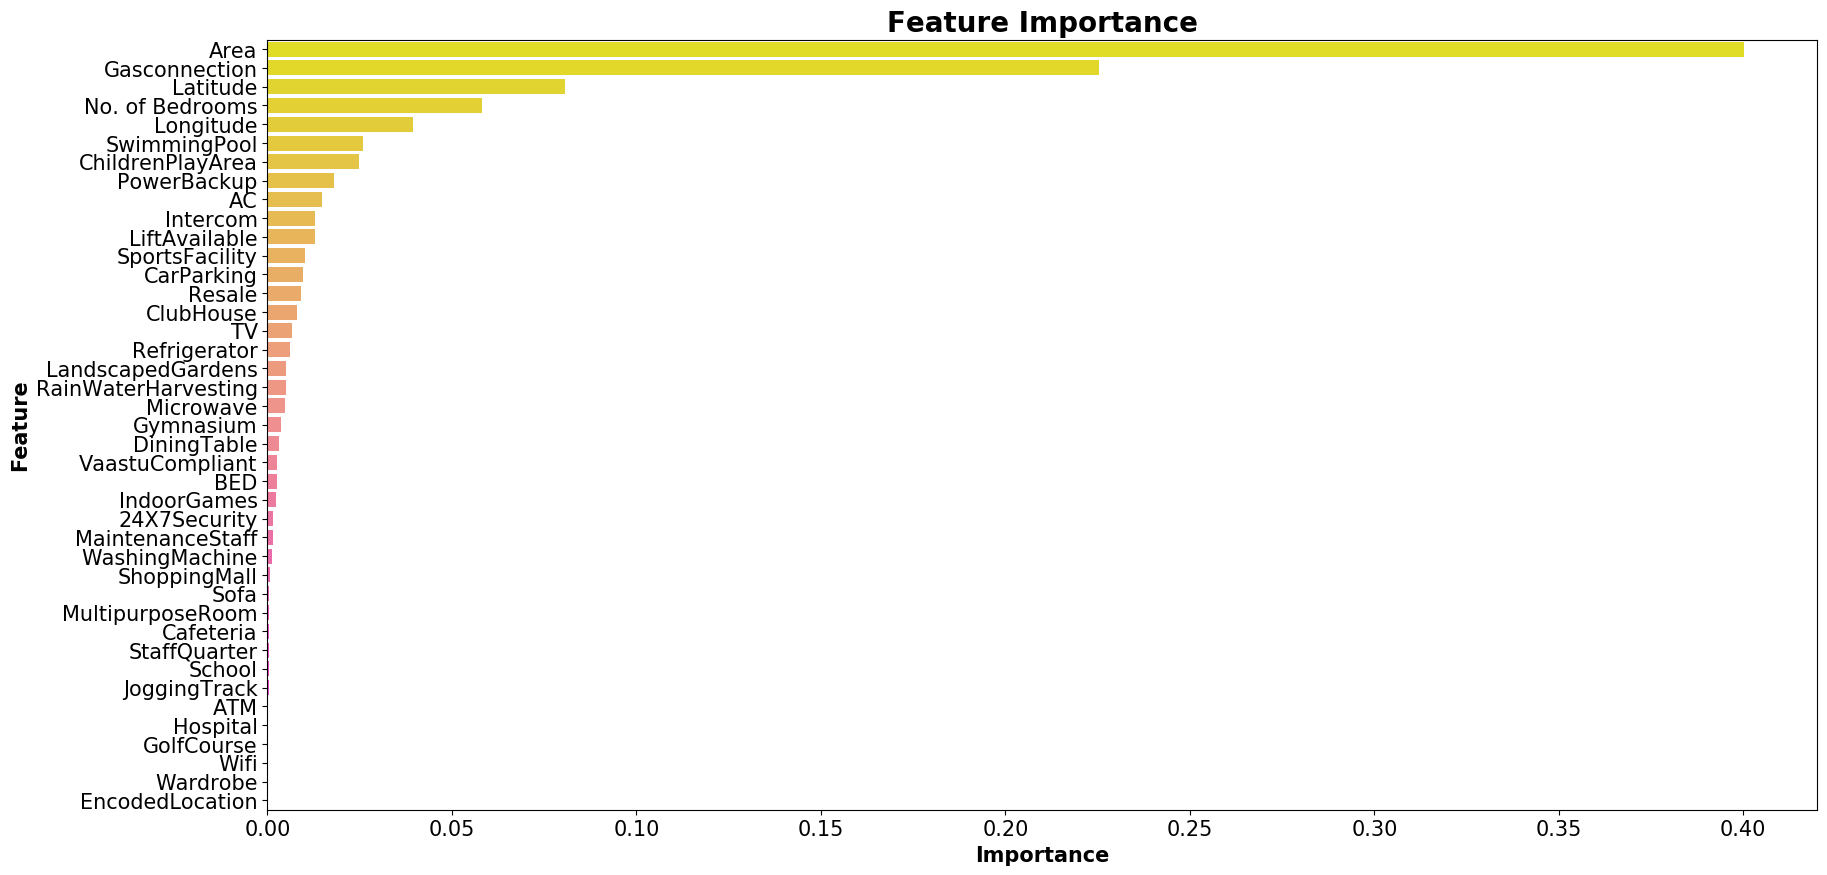

In [127]:
model3 = ExtraTreesRegressor()
model3.fit(train_X, train_y)
fi = pd.DataFrame(model3.feature_importances_,
             columns=['importance'])
fi['feature'] = feature_names
fi = fi.sort_values('importance', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=fi, x='importance', y='feature',
                 palette="spring_r")
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xlabel('Importance',fontsize=15, weight="bold");
ax.set_ylabel('Feature',fontsize=15,weight="bold");
plt.title("Feature Importance", size=20, weight="bold");

In [128]:
#feature_names = ['Area','No. of Bedrooms','Gasconnection','Intercom','2019 q1','2019 q2','2018 q1','2018 q2','2017 q1','2017 q2']
feature_names = ['Area','Gasconnection','Latitude','No. of Bedrooms','Longitude','SwimmingPool','ChildrenPlayArea','PowerBackup','AC']
X = merged[feature_names]
y = merged['Price']
minimum=1
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=4800)

In [151]:
#def train_model(m,name):
    
        #train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=531)
model = RandomForestRegressor()
model.fit(X=train_X, y=train_y)
predictions = model.predict(val_X)
x=np.sqrt(((predictions-val_y)**2).mean())
print("rms",x)

mae = mean_absolute_error(val_y, predictions)
r2 = r2_score(val_y, predictions)
        #print("")
print("mae {0} r2 {1}".format(mae,r2))
    #for i in predictions:
       # print(i)
    
#train_model(DecisionTreeRegressor(),"Decision Tree Regressor")
#train_model(RandomForestRegressor(),"Random Forest Regressor")   
#train_model(XGBRegressor(n_estimators=1000),"XGBoost Regressor")   

rms 24.786999336291245
mae 13.204811966071828 r2 0.9014909634018899


In [174]:
import pickle

In [175]:
pickle.dump(model,open('model.pkl','wb'))

In [176]:
pickled_model=pickle.load(open('model.pkl','rb'))

In [177]:
def prediction(val):
    return pickled_model.predict(val)

In [185]:
arr=[[500,1,28,2,77,0,0,0,0]]
print(prediction(arr))

[39.9595996]


/home/herrharambe/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [186]:
val_X

,Area,Gasconnection,Latitude,No. of Bedrooms,Longitude,SwimmingPool,ChildrenPlayArea,PowerBackup,AC
1524,500,1,28.69589,2,77.13730,0,0,0,0
1309,900,0,28.61739,3,77.05281,0,0,0,0
950,505,0,38.89037,2,-77.03196,0,0,0,0
743,550,0,28.61892,2,77.03151,0,0,0,0
304,1800,1,38.89037,3,-77.03196,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1372,750,0,28.61739,3,77.05281,0,0,0,0
1616,850,0,28.61892,3,77.03151,0,0,0,0
759,850,0,28.61739,3,77.05281,0,1,0,0
1238,1850,1,38.89037,4,-77.03196,0,1,1,0
